In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('goldhill.bmp', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
# from Image Compression Using DCT upon Various Quantization
# by Wael M. Khedr and Mohammed Abdelrazek
Q = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])
f = 20 # 50 and less to visualize

def generate_Q(factor):
    if factor > 50:
        factor = 100 - factor
        factor /= 50
    elif factor == 50:
        return Q
    else:
        factor = 50/factor
        
    return factor * Q

Q = generate_Q(f)

In [3]:
# devide to 8x8 Blocks and Calculate DCT
images_chunks = []

rows, cols = img.shape

for i in range(0, rows, 8):
    row_chunks = []
    for j in range(0, cols, 8):
        row_chunks.append(img[i:i+8, j:j+8])
    
    images_chunks.append(row_chunks)

All_DCT = []

for row in images_chunks:
    DCTS = []
    for chunk in row:
        chunk = np.float32(chunk)
        DCT = cv2.dct(chunk)            
        DCT_Q = np.divide(DCT, Q).astype(int)
        DCTS.append(DCT_Q)
        
    All_DCT.append(DCTS)

In [4]:
# inverse the DCT and save new IMAGE
All_Blocks = []
for row in All_DCT:
    Blocks = []
    for chunk in row:
        chunk = np.float32(chunk)
        iDCT = np.multiply(chunk, Q)
        iDCT = np.float32(iDCT)
        iDCT = cv2.idct(iDCT)
        for i in range(0, 8):
            for j in range(0, 8):
                if(iDCT[i][j] > 255):
                    iDCT[i][j] = 255
                elif(iDCT[i][j] < 0):
                    iDCT[i][j] = 0
                else:
                    iDCT[i][j] = int(iDCT[i][j])
                
        Blocks.append(iDCT)
    
    All_Blocks.append(Blocks)

In [5]:
#Fusion Blocks

compressed_img = []

for row in All_Blocks:
    
    line1 = []
    line2 = []
    line3 = []
    line4 = []
    line5 = []
    line6 = []
    line7 = []
    line8 = []
    
    for chunk in row:
        temp = []
        for _row in chunk:
            temp += list(_row)
        
        line1 += temp[0:8]
        line2 += temp[8:16]
        line3 += temp[16:24]
        line4 += temp[24:32]
        line5 += temp[32:40]
        line6 += temp[40:48]
        line7 += temp[48:56]
        line8 += temp[56:64]
    
    compressed_img.append(line1)
    compressed_img.append(line2)
    compressed_img.append(line3)
    compressed_img.append(line4)
    compressed_img.append(line5)
    compressed_img.append(line6)
    compressed_img.append(line7)
    compressed_img.append(line8)

compressed_img = np.array(compressed_img)

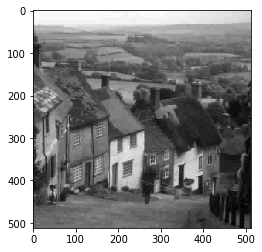

In [6]:
cv2.imwrite('20Q.bmp',compressed_img)

plt.imshow(compressed_img, cmap='gray')
plt.show()